<a href="https://colab.research.google.com/github/angel4sara/ICT-Assignments/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Pre-Processing: Titanic Dataset

## STEP 1: Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from google drive
#from google.colab import drive

#mount the gdrive
#drive.mount('content/drive')


In [3]:
data = pd.read_csv('/content/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## STEP 2: Understanding the Data

In [4]:
data.shape     #no. of rows and columns
print('Number of rows: ',data.shape[0])
print('Number of columns: ',data.shape[1])


data.shape

Number of rows:  891
Number of columns:  12


(891, 12)

In [5]:
data.columns    #column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#first few rows
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
data.tail(3)  #last few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
data.dtypes     #datatypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
data.info()         # datatypes, missing values, numerical, categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.describe()         #statistical info

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#statistics of categorical column
data.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
data.isna().sum()  #missing values #isnull()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
#Age : 177 /891 (num) ==> mean()
#Cabin : 687 ==> drop
#Embarked : 2 (cate) ==> mode

How do we handle missing values?
1. Remove the rows/columns with missing values (>50% is missing)
2. Fill the missing values with particular value:
    - Mean : numerical columns
    - Median : numerical columns which are right skewed
    - Mode : categorical columns

In [14]:
#fill ['Age] with mean values

#data['Age'] = data['Age'].fillna(data['Age'].mean(),inplace = True)

#New Pandas Update ==> 'df.method({col: value}, inplace=True)
data.fillna({'Age':data['Age'].mean()}, inplace = True)

In [15]:
#fill['Embarked'] with mode .mode()[0]
data.fillna({'Embarked': data['Embarked'].mode()[0]}, inplace = True)

In [16]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
#how do we handle

In [18]:
data.duplicated().sum()


0

## STEP 3: Data Visualisation


1.   What is the data trying to tell us?




### Univariate Analysis
- Analysing one column at a time   
    - Numerical column : Histogram
    - Categorical : Countplot
                                                                                                                                                                                                         

In [19]:
 #histograms of all numerical columns

num_col = data.select_dtypes(include = ['int64', 'float64']).columns
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [20]:
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

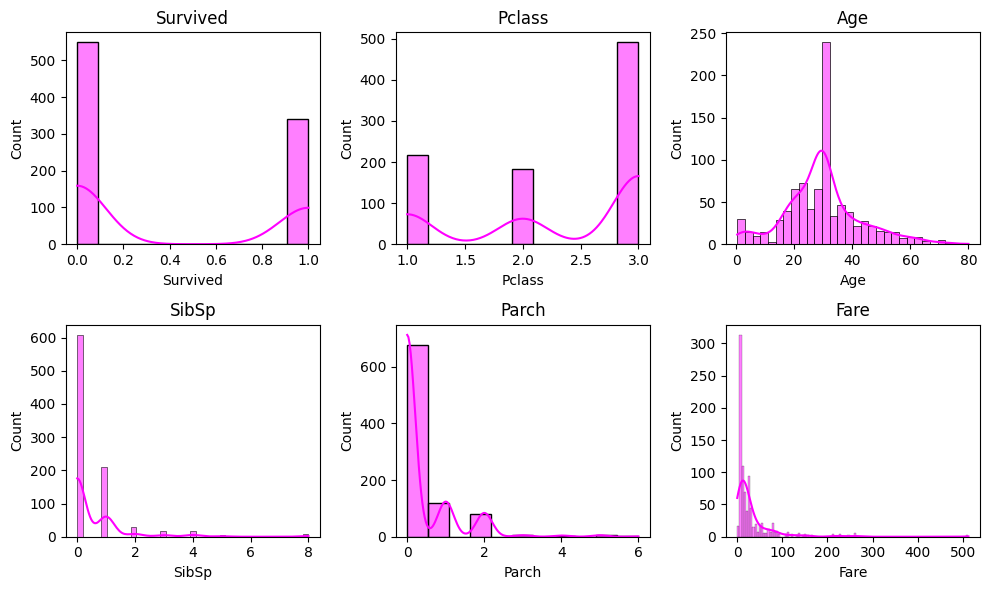

In [21]:
#create a 2x3 subplot grid to display the histogram of numeric column
fig, axes = plt.subplots(2,3,figsize=(10,6))


#plt each numeric columns
for i, column in enumerate(num_cols):
  row,col = divmod(i,3)     #calculate row number
  sns.histplot(data = data, x = column, kde = True, ax = axes[row][col], color = 'magenta')
  axes[row][col].set_title(column)


plt.tight_layout()
plt.show()

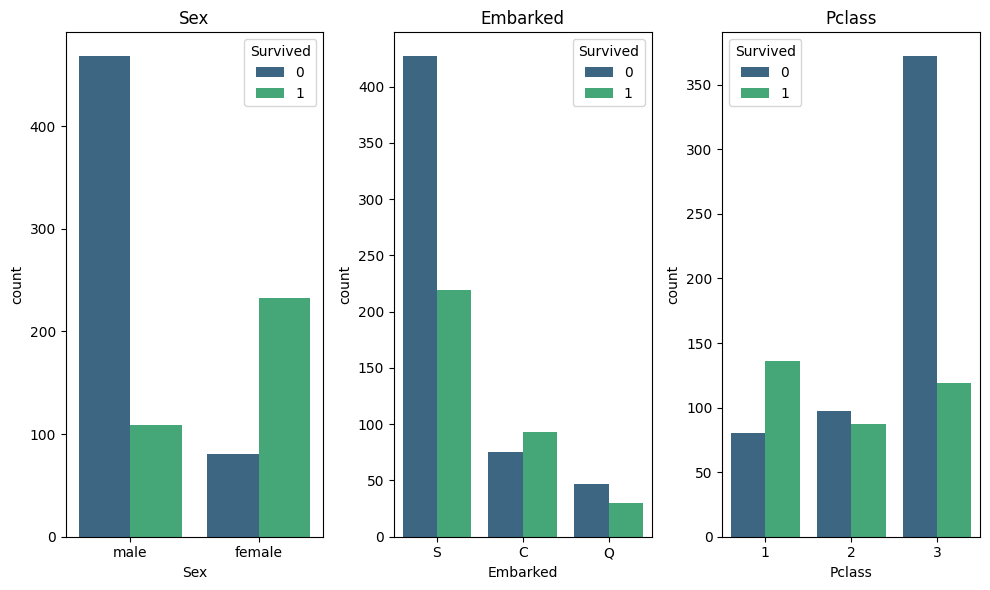

In [22]:
#Countplots for object datatypes - categorical values

cat_col = ['Sex','Embarked','Pclass']

#create a 1X2 subplot grid
fig, axes = plt.subplots(1,3,figsize =(10,6))

#plot each categorical column
for i, column in enumerate(cat_col):
  sns.countplot(data = data, x = column, ax = axes[i], palette = 'viridis', hue = 'Survived')
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

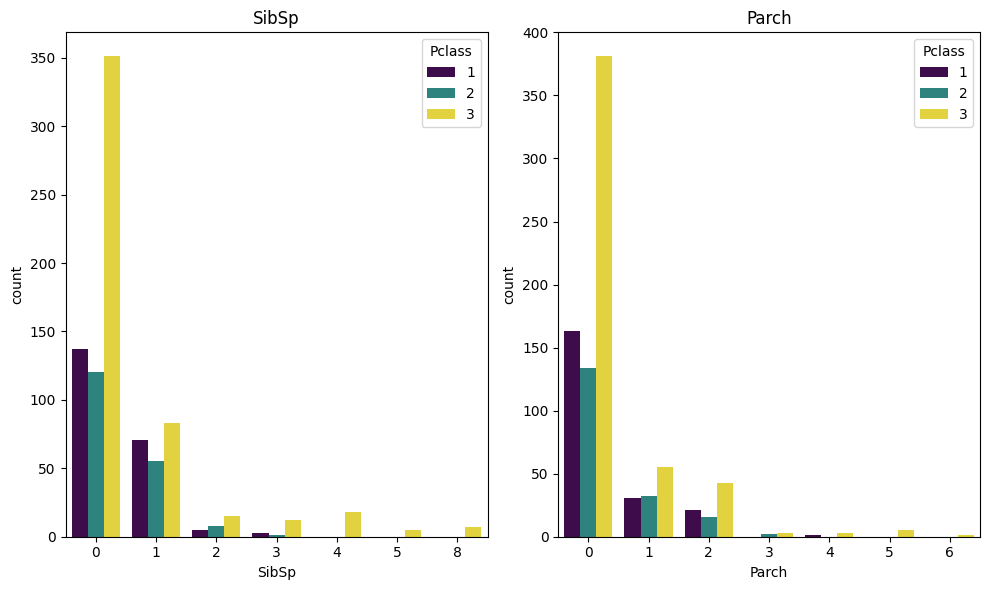

In [23]:
cat_col = ['SibSp', 'Parch']

#create a 1X2 subplot grid
fig, axes = plt.subplots(1,2,figsize =(10,6))

#plot each categorical column
for i, column in enumerate(cat_col):
  sns.countplot(data = data, x = column, ax = axes[i], palette = 'viridis', hue = 'Pclass')
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

### Bivariate Analysis
- Analysing 2 columns a time.
  - Num Vs Num : Scatterplot.
  - Num Vs Categorical : Boxplot, Barplot, Violinplot.
  - Categorical vs. Categorical : Countplot(stacked), heatmap

<Axes: xlabel='Age', ylabel='Fare'>

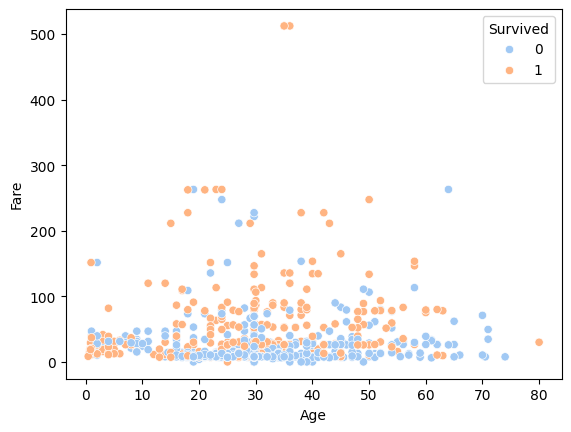

In [24]:
#scatter plot
#was the fare diff for diff age group
#does age make a difference in fare

sns.scatterplot( data = data, x = 'Age', y ='Fare', hue ='Survived', palette = 'pastel')

<Axes: xlabel='Pclass', ylabel='Fare'>

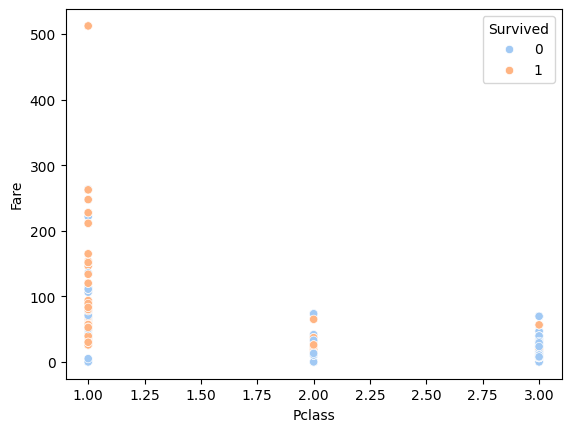

In [25]:
#scatter plot
#was the fare diff for diff Pclass group
#does Pclass make a difference in fare


sns.scatterplot( data = data, x = 'Pclass', y ='Fare', hue ='Survived', palette = 'pastel')

<Axes: xlabel='Pclass', ylabel='Age'>

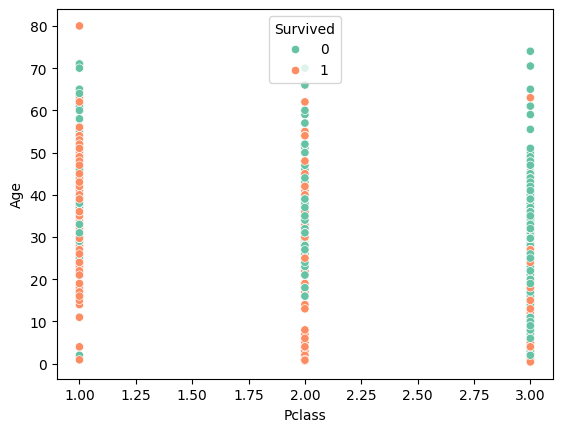

In [26]:
# Was Pclass age specific

sns.scatterplot( data = data, x = 'Pclass', y ='Age', palette = 'Set2', hue ='Survived')

<Axes: xlabel='Pclass', ylabel='Fare'>

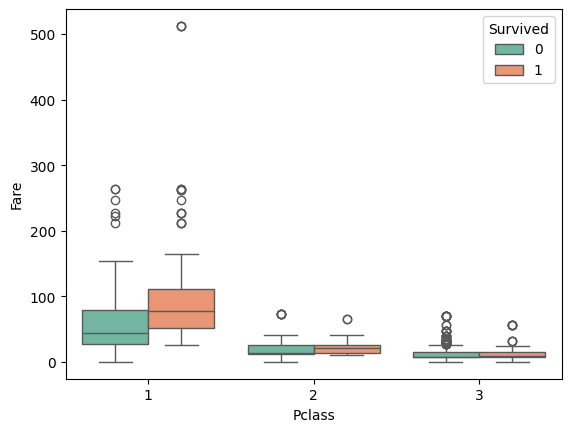

In [27]:
#num vs cat
#fare pclass
sns.boxplot(data = data, x = 'Pclass', y = 'Fare', hue = 'Survived', palette = 'Set2')

### Multivariate Analysis
- Understanding relationship between 3 or more columns.
  - Heatmap : Correlation matrix (numericals)
  - 3D scatter plot
  - Pairplots

Numerical columns ==> extract their correlation matrix ==> plot the results on a heatmap

Correlaton matrix ==> measures the linear relationships b/w the numerical columns based on strength and direction


- correlation values range from -1 to 1
- -1 : strong -ve correlation (-0.8 to 1)
- 0 : no correlation
- 1: strong +ve correlation (0.8 to 1)

<Axes: >

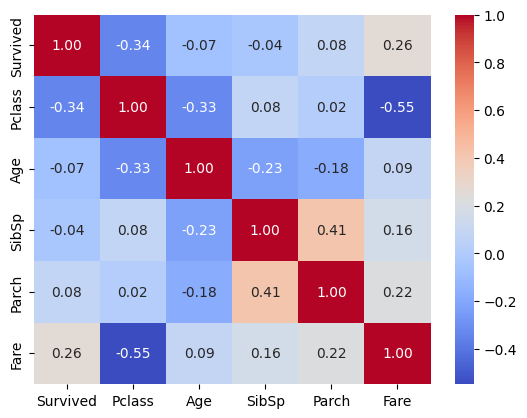

In [28]:

num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#compute correlation matrix

corr_matrix = data[num_cols].corr()
corr_matrix
#plot heatmap
sns.heatmap(corr_matrix, annot = True, fmt ='.2f', cmap ='coolwarm')

<Axes: xlabel='Embarked', ylabel='Pclass'>

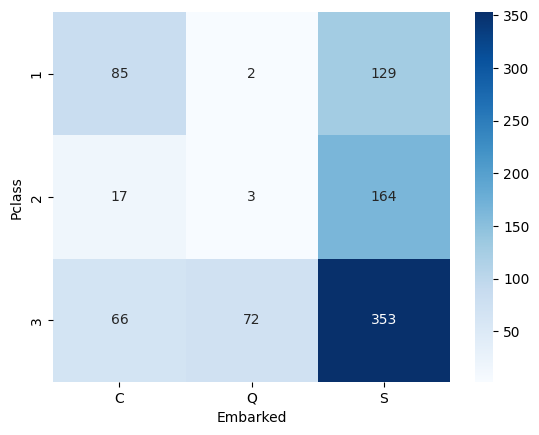

In [29]:
#heatmap for categorical data ==> cross-tabulation
cross_tab = pd.crosstab(data['Pclass'], data['Embarked'])


sns.heatmap(cross_tab, annot = True, cmap = 'Blues', fmt ='d')

## STEP 4: Removing Irrelevant Columns and Checking for Outliers

In [30]:
# remove irrelevant columns: do not add any useful info for analysis

#passengerId
#Name
#Cabin
#Ticket

irr_col = ['PassengerId','Name','Cabin','Ticket']

data = data.drop(columns = irr_col)
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [31]:
# check for outliers
#use boxplot for visualisaing the column distribution

# Method 1 : IQR   not normal distribution

# Calculate IQR of Fare
#Q1 = data['Fare'].quantile(0.25)
#Q3 = data['Fare'].quantile(0.75)

#IQR = Q3 -Q1

#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

#finding the outliers

#outliers = data[(data['Fare'] < lower_bound) | (data['Fare'] > upper_bound)]

#remove outliers
#data = data[(data['Fare']>= lower_bound)&(data['Fare']<= upper_bound)]
#data.shape

<Axes: xlabel='Fare', ylabel='Count'>

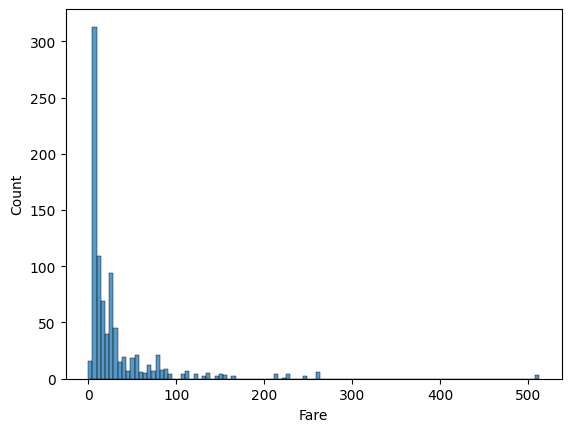

In [32]:
#Method 2 : Log Transformation

#right skewed data
sns.histplot(data = data, x = 'Fare')

<Axes: xlabel='Fare_log', ylabel='Count'>

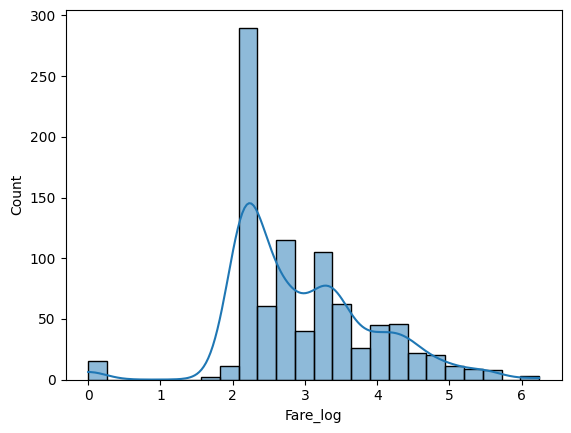

In [33]:
# applying log transformation on the 'Fare'
data['Fare_log'] = np.log1p(data['Fare'])    #log(1+x) to handle 0 values
sns.histplot(data = data, x = 'Fare_log', kde = True)

## STEP 5 : Encoding Categorical Columns

### Categorical Columns:

1. Nominal Categories: Independent Categories.

Colors

2. Ordinal Categories: Hierarchy in Categories

TEMP SIZE

In [34]:
#NOMINAL CAT : OneHot Encoding

#Embarked ==> nominal S C Q

embarked_enc = pd.get_dummies(data['Embarked'], prefix = 'Emba',dtype = int)

#concat back to data
data = pd.concat([data,embarked_enc], axis = 1)

data.drop('Embarked', axis =1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_log,Emba_C,Emba_Q,Emba_S
0,0,3,male,22.0,1,0,7.2500,2.110213,0,0,1
1,1,1,female,38.0,1,0,71.2833,4.280593,1,0,0
2,1,3,female,26.0,0,0,7.9250,2.188856,0,0,1
3,1,1,female,35.0,1,0,53.1000,3.990834,0,0,1
4,0,3,male,35.0,0,0,8.0500,2.202765,0,0,1


In [35]:
#ORDINAL :  Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#data['col_encoded'] = encoder.fit_transform(data['col_name'])


In [36]:
data['Sex_encoded'] = data['Sex'].map({'male':0,'female':1})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_log,Emba_C,Emba_Q,Emba_S,Sex_encoded
0,0,3,male,22.0,1,0,7.2500,2.110213,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,4.280593,1,0,0,1
2,1,3,female,26.0,0,0,7.9250,2.188856,0,0,1,1
3,1,1,female,35.0,1,0,53.1000,3.990834,0,0,1,1
4,0,3,male,35.0,0,0,8.0500,2.202765,0,0,1,0


In [37]:
data_cleaned = data[['Survived','Pclass','Age','Sex_encoded','SibSp','Parch','Fare_log','Emba_C','Emba_Q','Emba_S']]
data_cleaned

,Survived,Pclass,Age,Sex_encoded,SibSp,Parch,Fare_log,Emba_C,Emba_Q,Emba_S
0,0,3,22.000000,0,1,0,2.110213,0,0,1
1,1,1,38.000000,1,1,0,4.280593,1,0,0
2,1,3,26.000000,1,0,0,2.188856,0,0,1
3,1,1,35.000000,1,1,0,3.990834,0,0,1
4,0,3,35.000000,0,0,0,2.202765,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,0,2.639057,0,0,1
887,1,1,19.000000,1,0,0,3.433987,0,0,1
888,0,3,29.699118,1,1,2,3.196630,0,0,1
889,1,1,26.000000,0,0,0,3.433987,1,0,0


## STEP 6 : Scaling the Data

1. Min-Max Scaler if not normal; distribution
2. Standard Scaler if normal distribution

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols =['Age','Fare_log']
data_cleaned.loc[:,num_cols] = scaler.fit_transform(data_cleaned[num_cols])

In [39]:
data_cleaned

,Survived,Pclass,Age,Sex_encoded,SibSp,Parch,Fare_log,Emba_C,Emba_Q,Emba_S
0,0,3,-0.592481,0,1,0,-0.879741,0,0,1
1,1,1,0.638789,1,1,0,1.361220,1,0,0
2,1,3,-0.284663,1,0,0,-0.798540,0,0,1
3,1,1,0.407926,1,1,0,1.062038,0,0,1
4,0,3,0.407926,0,0,0,-0.784179,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.207709,0,0,0,-0.333698,0,0,1
887,1,1,-0.823344,1,0,0,0.487082,0,0,1
888,0,3,0.000000,1,1,2,0.242007,0,0,1
889,1,1,-0.284663,0,0,0,0.487082,1,0,0


In [40]:
x = data_cleaned.drop(['Survived'],axis=1)
y = data_cleaned['Survived']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [42]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()

In [43]:
logit_model.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = logit_model.predict(X_test)

In [45]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [46]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.7988826815642458
Precision is 0.7714285714285715
Recall is 0.7297297297297297
f1 score is 0.75


In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  k_model = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
  k_model.fit(X_train,y_train)
  y_pred = k_model.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [49]:
metric_k

[0.8324022346368715,
 0.8100558659217877,
 0.8212290502793296,
 0.8268156424581006,
 0.8212290502793296,
 0.7877094972067039,
 0.7988826815642458,
 0.8044692737430168,
 0.8268156424581006,
 0.8044692737430168,
 0.8268156424581006,
 0.8156424581005587]

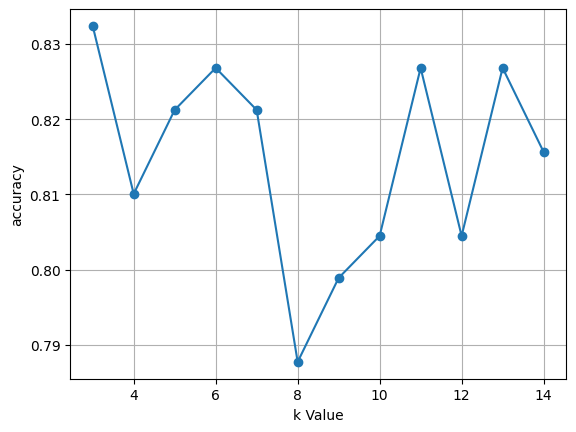

In [50]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [51]:
k_model = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski')
k_model.fit(X_train,y_train)
y_pred = k_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)

In [52]:
print(acc)

0.8212290502793296


In [53]:
#SVM
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.8156424581005587


In [54]:
#DT
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.7988826815642458


In [57]:
#RF
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'{acc:.2f}')

0.82
